In [1]:
%matplotlib inline
import pylhe
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# LHE File for "p p > h, h > a a"
h2aa_file = pylhe.readLHE('Events/run_pphaa/unweighted_events.lhe')

In [3]:
# LHE File for "p p > h, h > S S"
h2SS_file = pylhe.readLHE('Events/run_pphSS/unweighted_events.lhe')

In [4]:
def momenta(particles):
    total_momentum = 0
    p = [0, 0, 0]
    for ptc in particles:
        p[0] += ptc.px
        p[1] += ptc.py
        p[2] += ptc.pz
    total_momentum = np.sqrt(p[0]**2 + p[1]**2 + p[2]**2)
    return total_momentum

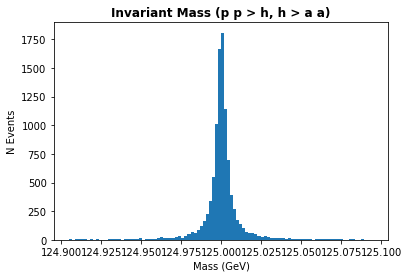

In [6]:
# Finding photons invariant mass 
aa_invariant_mass = []
for event in h2aa_file:
    photons = []
    e_photons = []
    for ptc in event.particles:
        if ptc.id == 22:
            photons.append(ptc)
            e_photons.append(ptc.e)
    aa_invariant_mass.append(np.sqrt(sum(e_photons)**2 - momenta(photons)**2))


# histogram for "p  p > H > a a"
plt.hist(aa_invariant_mass, bins = 100)
plt.xlabel('Mass (GeV)')
plt.ylabel('N Events')
plt.title('Invariant Mass (p p > h, h > a a)', fontweight="bold")

plt.show()

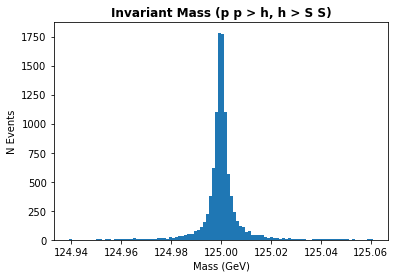

In [7]:
# Finding dark matter invariant mass 
ss_invariant_mass = []
for event in h2SS_file:
    dmatter = []
    e_dmatter = []
    for ptc in event.particles:
        if ptc.id == 9000005:
            dmatter.append(ptc)
            e_dmatter.append(ptc.e)
    ss_invariant_mass.append(np.sqrt(sum(e_dmatter)**2 - momenta(dmatter)**2))


# histogram for "p  p > H > S S"
plt.hist(ss_invariant_mass, bins = 100)
plt.xlabel('Mass (GeV)')
plt.ylabel('N Events')
plt.title('Invariant Mass (p p > h, h > S S)', fontweight="bold")

plt.show()